Regression Task (loan-default)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

logistic_model = LogisticRegression(max_iter=1000)

In [21]:
df_initial = pd.read_csv("Loan_Default.csv")

Data Exploration

In [22]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [23]:
df_initial.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [24]:
print('Duplicates: {}'.format(df_initial.duplicated().sum()))

df_initial.drop_duplicates(inplace = True)

Duplicates: 0


In [25]:
print(df_initial.shape)

(148670, 34)


In [26]:
print('Number of Loans:', df_initial.ID.nunique())

Number of Loans: 148670


<Figure size 1200x800 with 0 Axes>

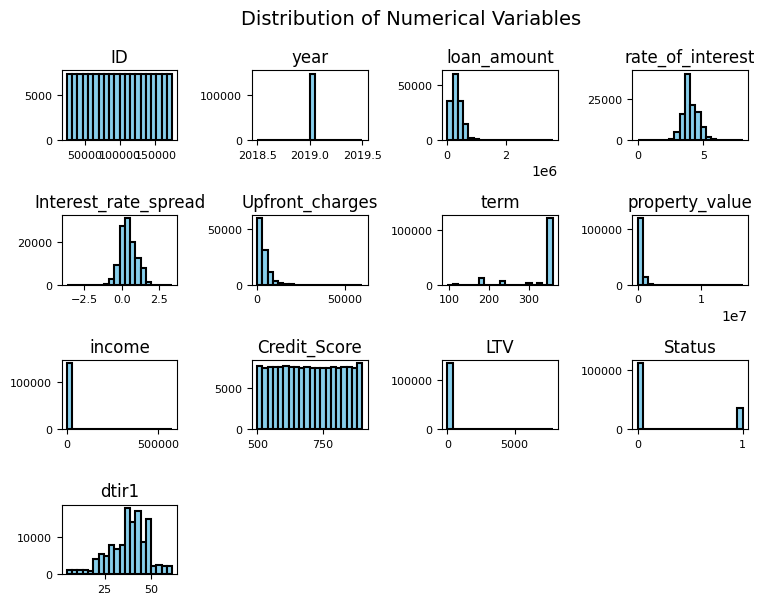

In [27]:
numerical_vars = df_initial.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df_initial[numerical_vars]

plt.figure(figsize=(12, 8))
df_numerical.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Distribution of Numerical Variables', x=0.65, y=1.25, fontsize=14)
plt.show()

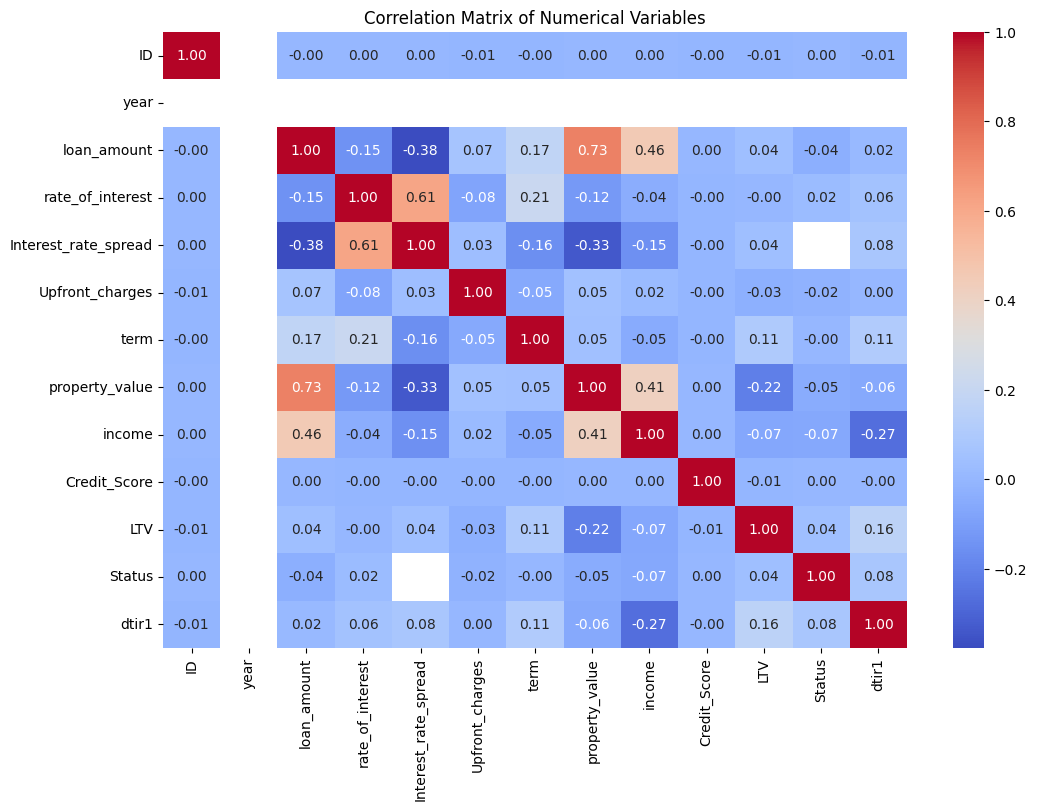

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [29]:
# Handling missing values (replace with mean for numerical values and drop rows for categorical values)
df_initial.dropna(subset=['loan_limit'], inplace=True)
for column in df_initial.columns:
    if column != 'loan_limit' and df_initial[column].dtype in ['int64', 'float64']:
        df_initial[column] = df_initial[column].fillna(df_initial[column].mean())

# Check and display number of missing values in each column
missing_values_count = df_initial.isnull().sum()
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
ID                             0
year                           0
loan_limit                     0
Gender                         0
approv_in_adv                908
loan_type                      0
loan_purpose                 134
Credit_Worthiness              0
open_credit                    0
business_or_commercial         0
loan_amount                    0
rate_of_interest               0
Interest_rate_spread           0
Upfront_charges                0
term                           0
Neg_ammortization            121
interest_only                  0
lump_sum_payment               0
property_value                 0
construction_type              0
occupancy_type                 0
Secured_by                     0
total_units                    0
income                         0
credit_type                    0
Credit_Score                   0
co-applicant_credit_type       0
age                          188
submission_of_application    188
LT

Model Building

In [30]:
X = df_initial.drop(columns=['Status'])  # Features (all columns except 'Status')
y = df_initial['Status']  # Target variable

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the encoded dataset into training and testing sets
X_train_, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [31]:
# Build Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_, y_train)

# Predict using the Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression model:", accuracy_logistic)

# Classification report for logistic regression model
print("Classification Report for Logistic Regression model:")
print(classification_report(y_test, y_pred_logistic))

Accuracy of Logistic Regression model: 0.7541801417463704
Classification Report for Logistic Regression model:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     21921
           1       0.00      0.00      0.00      7145

    accuracy                           0.75     29066
   macro avg       0.38      0.50      0.43     29066
weighted avg       0.57      0.75      0.65     29066



C:\Users\koala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\koala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [32]:
# Build Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_, y_train)

# Predict using the Random Forest model
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy of Random Forest model:", accuracy_random_forest)

# Classification report for Random Forest model
print("\nClassification Report for Random Forest model:")
print(classification_report(y_test, y_pred_random_forest))

Accuracy of Random Forest model: 1.0

Classification Report for Random Forest model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21921
           1       1.00      1.00      1.00      7145

    accuracy                           1.00     29066
   macro avg       1.00      1.00      1.00     29066
weighted avg       1.00      1.00      1.00     29066



In [33]:
# Build KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_, y_train)

# Predict using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN model:", accuracy_knn)
print("Classification Report for KNN model:")
print(classification_report(y_test, y_pred_knn))

Accuracy of KNN model: 0.8285625817105897
Classification Report for KNN model:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     21921
           1       0.73      0.47      0.58      7145

    accuracy                           0.83     29066
   macro avg       0.79      0.71      0.73     29066
weighted avg       0.82      0.83      0.81     29066

